# Synthetic signals

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Simple chirp

We can use `scipy.signal.chirp()` to generate a single sweep.

Let's sweep over 5 octaves; there are four shapes of frequency function:

In [28]:
methods =  {'linear', 'quadratic', 'logarithmic', 'hyperbolic'}

In [45]:
from scipy.signal import chirp

f0 = 2    # Start frequency.
t1 = 2.0  # End time.
f1 = 64  # End frequency.

dt = 0.001

t = np.arange(0, t1, dt)

In [42]:
f_linear = f0 + (f1 - f0) * t / t1
f_quadratic = f0 + (f1 - f0) * t**2 / t1**2
f_logarithmic = f0 * (f1/f0)**(t/t1)
f_hyperbolic = f0*f1*t1 / ((f0 - f1)*t + f1*t1)

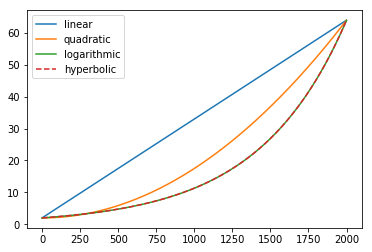

In [44]:
plt.plot(f_linear, label='linear')
plt.plot(f_quadratic, label='quadratic')
plt.plot(f_logarithmic, label='logarithmic')
plt.plot(f_logarithmic, '--', label='hyperbolic')
plt.legend()

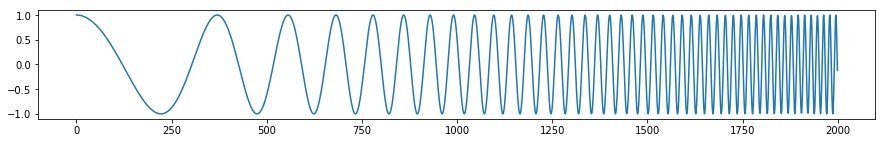

In [46]:
chp = chirp(t, f0, t1, f1, method='quadratic')

plt.figure(figsize=(15, 2))
plt.plot(chp)

## Mixed signal

Synthetic signals in time-frequency analysis are often made by combining sine waves, chirps and wavelets. Let's instead make a synthetic signal in a geological way, by making layers of 'rock' then convolving with a wavelet.

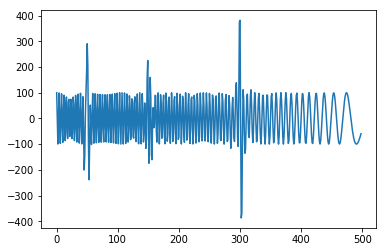

In [100]:
vp = 2000 * np.ones(500)
vp[:50] = 1490
vp[150:152] = 2250
vp[154:156] = 2250

vp2 = 2000 * np.ones(500)
vp2[300:303] = 2300

from scipy.signal import ricker
w1 = ricker(64, 2)
syn1 = np.convolve(np.diff(vp), w1, mode='same')

w2 = ricker(64, 6)
syn2 = np.convolve(np.diff(vp2), w, mode='same')
syn2 += np.convolve(np.diff(vp2), w2, mode='same')

from scipy.signal import chirp
dt = 0.002
t = np.arange(0, syn.size*dt, dt)
chp = chirp(t, 128, t[-1], 8, method='quadratic')

syn = syn1 + syn2 + 100 * chp
# chp = chirp(t, 20, t[-1], 30, method='linear')
# syn += 50 * chp

#plt.plot(w)
plt.plot(syn)
plt.show()

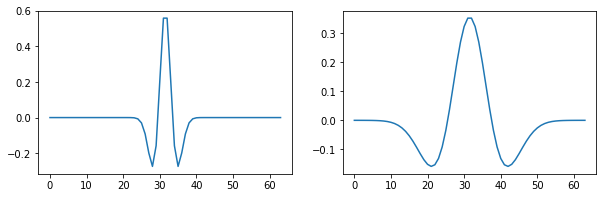

In [110]:
fig, axs = plt.subplots(figsize=(10, 3), ncols=2)
axs[0].plot(w1)
axs[1].plot(w2)

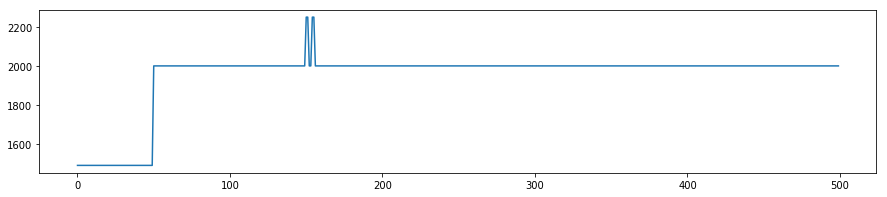

In [101]:
plt.figure(figsize=(15, 3))
plt.plot(vp)

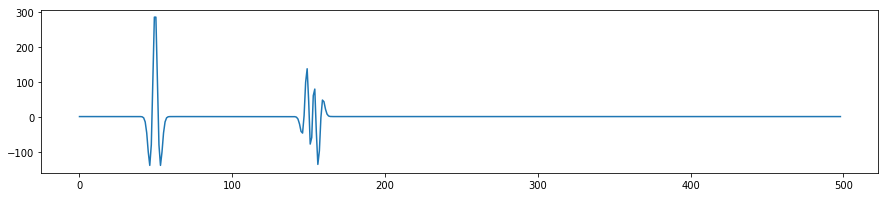

In [102]:
plt.figure(figsize=(15, 3))
plt.plot(syn1)

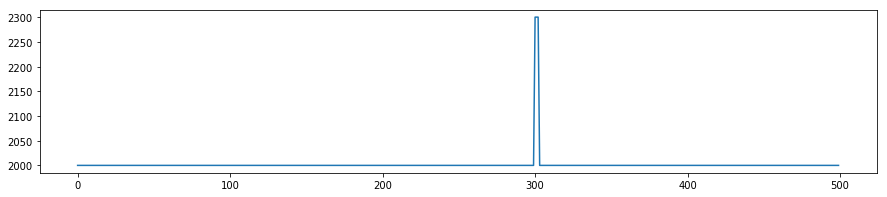

In [103]:
plt.figure(figsize=(15, 3))
plt.plot(vp2)

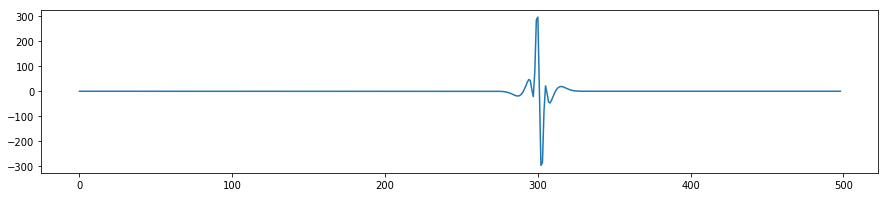

In [104]:
plt.figure(figsize=(15, 3))
plt.plot(syn2)

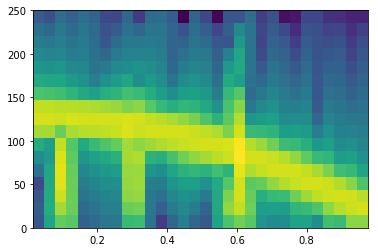

In [105]:
_ = plt.specgram(syn, Fs=1/dt, NFFT=32, noverlap=16)

In [111]:
from scipy.interpolate import interp1d
import IPython.display as ipd

n = 1000  # Factor to subsample

oldt = np.arange(0, syn.size)
newt = np.arange(0, syn.size, 1/n)

func = interp1d(oldt, syn, bounds_error=False, fill_value=0)
news = func(newt)

In [112]:
shift = 50 # Hz
NEWS = np.fft.rfft(news)
freq = np.fft.rfftfreq(news.size, dt)
shift = int(shift / freq[1])
NEWS_shift = np.roll(NEWS, shift)
NEWS_shift[:shift] = 0
news_shift = np.fft.irfft(NEWS_shift)

In [114]:
fs = 1 / dt
ipd.Audio(news, rate=n*fs/4)

In [7]:
header  = "Synthetic signal.\n"
header += "(c) Agile Scientific, licensed CC-BY.\n"
header += f"sample rate = {fs} Hz"

In [8]:
np.savetxt(f'benchmark_signals/synthetic_{fs}Hz.txt', syn, header=header)

## Synthetic seismic